# 타이타닉(Titanic)
- 출처: https://www.kaggle.com/c/titanic

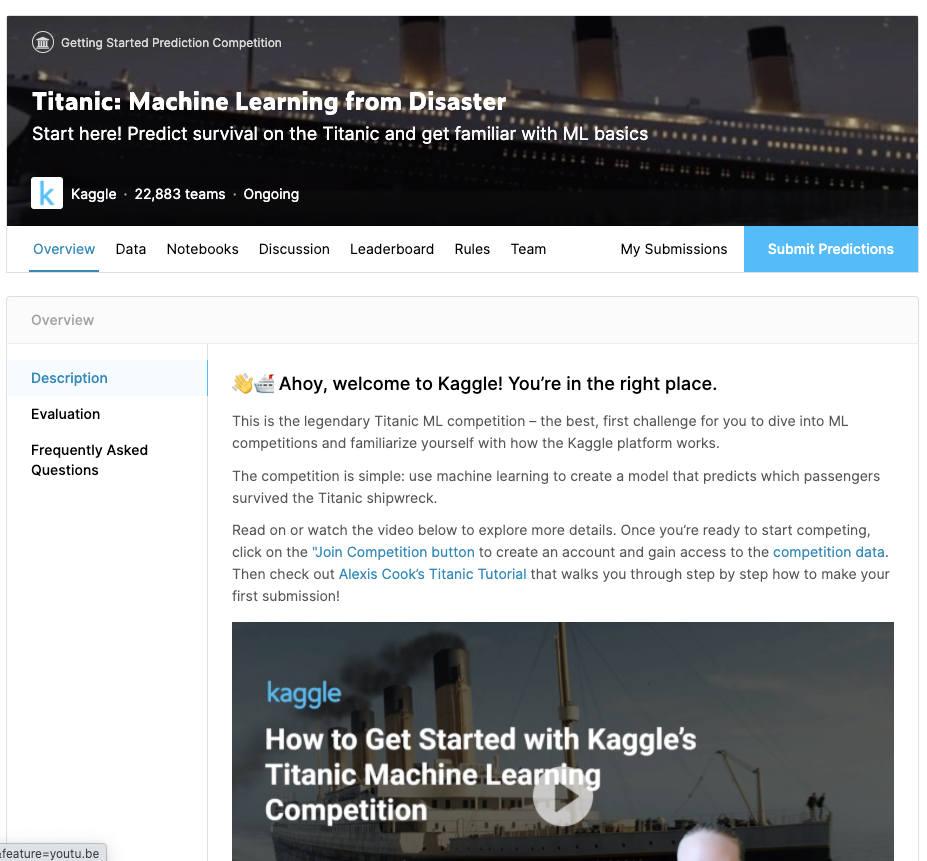



## 데이터셋 - 변수설명
### 독립변수(X)
- pclass(좌석 등급) : 1 = 1등석, 2 = 2등석, 3 = 3등석 
    - 사회적 계층을 대표(1등석 = Upper / 2등석 = Middle / 3등석 = Lower)
- sex(성별)
- Age(나이)
- sibsp(형제 자매 / 배우자 수)
- parch(부모와 자식 수)
- 어떤 아이들은 유모와 탑승했으며, 그 결과 0이 있음
- ticket(티켓 번호)
- fare(요금)
- cabin(객실 번호)
- embarked(정박 항구) : C = Cherbourg, Q = Queenstown, S = Southampton

### 종속변수(y)
- survival(생존 여부) : 0 = 사망, 1 = 생존

## 데이터 전처리

### 데이터 불러오기

In [76]:
# 연산 처리를 위한 패키지
import numpy as np
import pandas as pd

# 데이터 분석을 위한 패키지
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

# 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

In [77]:
df_train = pd.read_csv('./data/classification/train.csv')
df_test = pd.read_csv('./data/classification/test.csv')
df_gender = pd.read_csv('./data/classification/gender_submission.csv')

In [78]:
# train 데이터 확인
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [79]:
# row, columns
df_train.shape

(891, 12)

In [80]:
# test 데이터 확인
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [81]:
# row, columns
df_test.shape

(418, 11)

In [82]:
# test 데이터의 Survived 데이터 확인
df_gender.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [83]:
df_gender.shape

(418, 2)

### 데이터 합치기

In [84]:
# test 데이터에 Survived 값 입력
df_test['Survived'] = df_gender['Survived']
df = pd.concat([df_train, df_test])
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [85]:
# 컬럼 정렬
df = df[['PassengerId',
         'Survived',
         'Pclass',
         'Name',
         'Sex',
         'Age',
         'SibSp',
         'Parch',
         'Ticket',
         'Fare',
         'Cabin',
         'Embarked']]

# index reset
df.reset_index(drop=True) 
df.reset_index()

# index를 1부터 시작
df.index += 1 
df.head()

PassengerId  Survived  Pclass  \
1            1         0       3   
2            2         1       1   
3            3         1       3   
4            4         1       1   
5            5         0       3   

                                                Name     Sex   Age  SibSp  \
1                            Braund, Mr. Owen Harris    male  22.0      1   
2  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3                             Heikkinen, Miss. Laina  female  26.0      0   
4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
5                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
1      0         A/5 21171   7.2500   NaN        S  
2      0          PC 17599  71.2833   C85        C  
3      0  STON/O2. 3101282   7.9250   NaN        S  
4      0            113803  53.1000  C123        S  
5      0            373450   8.0500   NaN        S

In [86]:
df.shape

(1309, 12)

### 결측치 확인

<AxesSubplot:>

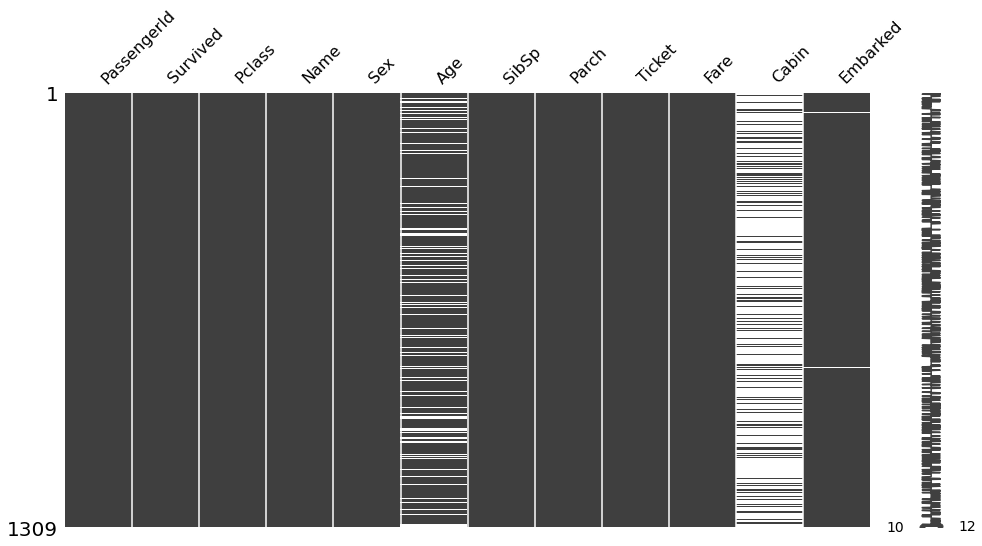

In [87]:
# Missing data 시각적으로 확인하는 방법
msno.matrix(df, figsize=(16,8))

In [88]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [89]:
df_titanic = df.drop(['Cabin'], axis=1)
df_titanic = df_titanic.dropna()
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [90]:
df_titanic.shape

(1043, 11)

## 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)

In [91]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 1 to 416
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1043 non-null   int64  
 1   Survived     1043 non-null   int64  
 2   Pclass       1043 non-null   int64  
 3   Name         1043 non-null   object 
 4   Sex          1043 non-null   object 
 5   Age          1043 non-null   float64
 6   SibSp        1043 non-null   int64  
 7   Parch        1043 non-null   int64  
 8   Ticket       1043 non-null   object 
 9   Fare         1043 non-null   float64
 10  Embarked     1043 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 97.8+ KB


### 기술통계 살펴보기

In [92]:
df_titanic.describe()

PassengerId     Survived       Pclass          Age        SibSp  \
count  1043.000000  1043.000000  1043.000000  1043.000000  1043.000000   
mean    655.391179     0.397891     2.209012    29.813202     0.504314   
std     377.527036     0.489697     0.840685    14.366254     0.913080   
min       1.000000     0.000000     1.000000     0.170000     0.000000   
25%     326.500000     0.000000     1.000000    21.000000     0.000000   
50%     662.000000     0.000000     2.000000    28.000000     0.000000   
75%     973.500000     1.000000     3.000000    39.000000     1.000000   
max    1307.000000     1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1043.000000  1043.000000  
mean      0.421860    36.603024  
std       0.840655    55.753648  
min       0.000000     0.000000  
25%       0.000000     8.050000  
50%       0.000000    15.750000  
75%       1.000000    35.077100  
max       6.000000   512.329200

In [93]:
## 중간값, 결측치, 왜도, 첨도 표시
df_stats = df_titanic.describe().T

skew_results = []
kurtosis_results = []
null_results = []
median_results = []

for idx, val in enumerate(df_stats.index):

    median_results.append(df_titanic[val].median())
    skew_results.append(df_titanic[val].skew())
    kurtosis_results.append(df_titanic[val].kurtosis())
    null_results.append(df_titanic[val].isnull().sum())  

df_stats['median'] = median_results
df_stats['missing'] = null_results
df_stats['skewness'] = skew_results
df_stats['kurtosis'] = kurtosis_results
df_stats

count        mean         std   min     25%     50%       75%  \
PassengerId  1043.0  655.391179  377.527036  1.00  326.50  662.00  973.5000   
Survived     1043.0    0.397891    0.489697  0.00    0.00    0.00    1.0000   
Pclass       1043.0    2.209012    0.840685  1.00    1.00    2.00    3.0000   
Age          1043.0   29.813202   14.366254  0.17   21.00   28.00   39.0000   
SibSp        1043.0    0.504314    0.913080  0.00    0.00    0.00    1.0000   
Parch        1043.0    0.421860    0.840655  0.00    0.00    0.00    1.0000   
Fare         1043.0   36.603024   55.753648  0.00    8.05   15.75   35.0771   

                   max  median  missing  skewness   kurtosis  
PassengerId  1307.0000  662.00        0 -0.000728  -1.195035  
Survived        1.0000    0.00        0  0.417831  -1.828928  
Pclass          3.0000    2.00        0 -0.409915  -1.465153  
Age            80.0000   28.00        0  0.406883   0.161351  
SibSp           8.0000    0.00        0  2.806470  10.537440  
Parch           6.0000    0.00        0  2.660404   9.339196  
Fare          512.3292   15.75        0  4.122509  23.691411

### 독립변수(Fare)의 데이터 분포도 확인
- Fare의 왜도(skewness)값이 4.12, 왼쪽으로 치우져 있음.
- 자연로그를 취해서 왜도값을 조정하면 고른 분포를 띔.

<AxesSubplot:>

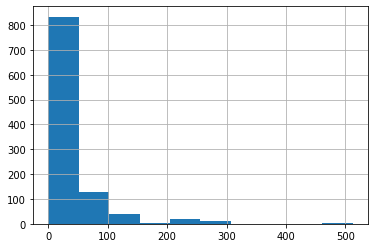

In [94]:
df_titanic['Fare'].hist()

### 범주형 데이터 - 생존 여부 확인
- Pclass, Sex, SibSp, Parch

In [95]:
df_titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

Survived
Pclass          
1       0.595745
2       0.429119
3       0.270000

In [96]:
df_titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

Survived
Sex             
female  0.834197
male    0.141553

In [97]:
df_titanic[['SibSp', 'Survived']].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)

Survived
SibSp          
1      0.525000
2      0.444444
0      0.354839
3      0.312500
4      0.181818
5      0.166667
8      0.000000

In [98]:
df_titanic[['Parch', 'Survived']].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending=False)

Survived
Parch          
3      0.625000
2      0.577320
1      0.556250
0      0.343791
4      0.200000
5      0.166667
6      0.000000

### 종속변수(y) balance 확인

In [99]:
df_titanic['Survived'].value_counts()

0    628
1    415
Name: Survived, dtype: int64

In [100]:
total = df_titanic['Survived'].value_counts()[0] + df_titanic['Survived'].value_counts()[1]

print("Survied = 0 은 ", round(df_titanic['Survived'].value_counts()[0] / total *100, 2), '퍼센트')
print("Survied = 1 은 ", round(df_titanic['Survived'].value_counts()[1] / total *100, 2), '퍼센트')

Survied = 0 은  60.21 퍼센트
Survied = 1 은  39.79 퍼센트


## 데이터 타입 분류

In [101]:
def separate_dtype(df):
    df_catg = df.select_dtypes(include=['object'])
    df_numr = df.select_dtypes(include=['int64', 'float64'])
    return [df_catg, df_numr]

(df_catg, df_numr) = separate_dtype(df)

In [102]:
# 수치형 데이터 타입
df_numr.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
1            1         0       3  22.0      1      0   7.2500
2            2         1       1  38.0      1      0  71.2833
3            3         1       3  26.0      0      0   7.9250
4            4         1       1  35.0      1      0  53.1000
5            5         0       3  35.0      0      0   8.0500

In [103]:
# 범주형&오브젝트 타입 
df_catg.head()

Name     Sex  \
1                            Braund, Mr. Owen Harris    male   
2  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
3                             Heikkinen, Miss. Laina  female   
4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
5                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked  
1         A/5 21171   NaN        S  
2          PC 17599   C85        C  
3  STON/O2. 3101282   NaN        S  
4            113803  C123        S  
5            373450   NaN        S

### 범주형 및 Object type 데이터 처리
- Name(이름): Mr, Miss, Mrs, Master, Others
- Sex(성별): male, female
- Ticket(티켓 번호)
- Cabin(객실 번호)
- Embarked(정박 항구) : C = Cherbourg, Q = Queenstown, S = Southampton

#### object type 데이터 처리 - Name
- Name의 호칭별로 분류
- 콤마(,)와 점(.)을 기준으로 해서 중간의 호칭을 분류함.

In [104]:
df_titanic['Name'].value_counts()

Kelly, Mr. James                                      2
Connolly, Miss. Kate                                  2
Bengtsson, Mr. John Viktor                            1
Nesson, Mr. Israel                                    1
Chambers, Mr. Norman Campbell                         1
                                                     ..
Weir, Col. John                                       1
Salkjelsvik, Miss. Anna Kristine                      1
Stankovic, Mr. Ivan                                   1
Hays, Mrs. Charles Melville (Clara Jennings Gregg)    1
Lurette, Miss. Elise                                  1
Name: Name, Length: 1041, dtype: int64

In [105]:
arr_title = list()
for s in df_titanic['Name'].values:
    title = s.split(",")[1].split(".")[0].replace(" ", "")
    
    arr_title.append(title)
    
df_titanic['Title'] = arr_title
df_titanic.tail()

PassengerId  Survived  Pclass  \
410         1301         1       3   
412         1303         1       1   
413         1304         1       3   
415         1306         1       1   
416         1307         0       3   

                                                Name     Sex   Age  SibSp  \
410                        Peacock, Miss. Treasteall  female   3.0      1   
412  Minahan, Mrs. William Edward (Lillian E Thorpe)  female  37.0      1   
413                   Henriksson, Miss. Jenny Lovisa  female  28.0      0   
415                     Oliva y Ocana, Dona. Fermina  female  39.0      0   
416                     Saether, Mr. Simon Sivertsen    male  38.5      0   

     Parch              Ticket     Fare Embarked Title  
410      1  SOTON/O.Q. 3101315   13.775        S  Miss  
412      0               19928   90.000        Q   Mrs  
413      0              347086    7.775        S  Miss  
415      0            PC 17758  108.900        C  Dona  
416      0  SOTON/O.Q. 3101262    7.250        S    Mr

In [106]:
df_titanic['Title'].value_counts()

Mr             580
Miss           209
Mrs            169
Master          53
Rev              8
Dr               7
Col              4
Mlle             2
Major            2
theCountess      1
Lady             1
Don              1
Dona             1
Capt             1
Mme              1
Ms               1
Jonkheer         1
Sir              1
Name: Title, dtype: int64

In [107]:
# Mr, Miss, Mrs, Master를 제외하고 나머지는 Others로 분류한다.
df_titanic['Title'] = df_titanic['Title'].replace(['Rev','Dr','Col','Major','Sir','Don','Lady','theCountess'
                                   ,'Jonkheer','Dona','Capt'],'Others')

# 또한 프랑스어 및 영어 Ms는 다음과 같이 처리한다.
# Mlle -> Miss  / Mme -> Mrs / Ms -> Miss

df_titanic['Title'] = df_titanic['Title'].replace('Mlle','Miss')
df_titanic['Title'] = df_titanic['Title'].replace('Ms','Miss')
df_titanic['Title'] = df_titanic['Title'].replace('Mme','Mrs')
df_titanic['Title'].value_counts()

Mr        580
Miss      212
Mrs       170
Master     53
Others     28
Name: Title, dtype: int64

#### 범주형 데이터 처리 - Sex
- female = 0, male = 1

In [108]:
df_titanic['Sex'].value_counts()

male      657
female    386
Name: Sex, dtype: int64

In [109]:
# 사이킷런 LabelEncoder를 이용하면 쉽게 가능함.

enc = LabelEncoder()
enc.fit(df_titanic['Sex'])
df_titanic['Sex'] = enc.transform(df_titanic['Sex'])
df_titanic['Sex']

1      1
2      0
3      0
4      0
5      1
      ..
410    0
412    0
413    0
415    0
416    1
Name: Sex, Length: 1043, dtype: int64

In [110]:
# 숫자로 인코딩 된 값들
enc.classes_

array(['female', 'male'], dtype=object)

In [111]:
# 해당 값에 대한 숫자
enc.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

#### (참고) object type 데이터 처리 - Ticket
- 티켓은 특별히 분류 할 수 없음.

In [112]:
# 티켓은 특별히 분류 할 수 없음.
df_titanic['Ticket'].value_counts()

CA 2144         8
PC 17608        7
347082          7
S.O.C. 14879    7
3101295         7
               ..
7553            1
17463           1
237565          1
347078          1
113798          1
Name: Ticket, Length: 730, dtype: int64

####  (참고) object type 데이터 처리 - Cabin
- Canbin 특별히 분류 할 수 없음.
- 위에서 Cabin은 column에서 제외함

In [113]:
# Canbin은 앞자리만 따서 분류 할 수 있음. 하지만 Null값이 너무나 많음.
df_catg['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
B96 B98            4
C22 C26            4
                  ..
B52 B54 B56        1
E52                1
A10                1
E60                1
D46                1
Name: Cabin, Length: 186, dtype: int64

In [114]:
df_catg['Cabin'].str[:1].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [115]:
df_catg['Cabin'].isnull().sum()

1014

In [116]:
df.loc[(df['Pclass'] == 1), 'Cabin'].str[:1].value_counts()

C    94
B    65
D    40
E    34
A    22
T     1
Name: Cabin, dtype: int64

In [117]:
df.loc[(df['Pclass'] == 2), 'Cabin'].str[:1].value_counts()

F    13
D     6
E     4
Name: Cabin, dtype: int64

In [118]:
df.loc[(df['Pclass'] == 3), 'Cabin'].str[:1].value_counts()

F    8
G    5
E    3
Name: Cabin, dtype: int64

In [119]:
# Cabin 값은 PClass로 설명이 될것 같음.

#### 범주형 데이터 처리 - Embarked
- Embarked(정박 항구) : S = Southampton, C = Cherbourg, Q = Queenstown
- C=0, Q=1, S=2

In [120]:
df_titanic['Embarked'].value_counts()

S    781
C    212
Q     50
Name: Embarked, dtype: int64

In [121]:
enc = LabelEncoder()
df_titanic['Embarked'] = enc.fit_transform(df_titanic['Embarked'])
df_titanic.head()

PassengerId  Survived  Pclass  \
1            1         0       3   
2            2         1       1   
3            3         1       3   
4            4         1       1   
5            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
1                            Braund, Mr. Owen Harris    1  22.0      1      0   
2  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
3                             Heikkinen, Miss. Laina    0  26.0      0      0   
4       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
5                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked Title  
1         A/5 21171   7.2500         2    Mr  
2          PC 17599  71.2833         0   Mrs  
3  STON/O2. 3101282   7.9250         2  Miss  
4            113803  53.1000         2   Mrs  
5            373450   8.0500         2    Mr

In [122]:
# 숫자로 인코딩 된 값들
enc.classes_

array(['C', 'Q', 'S'], dtype=object)

In [123]:
# 해당 값에 대한 숫자
enc.inverse_transform([0,1,2])

array(['C', 'Q', 'S'], dtype=object)

## 범주형 변수 Dummy 처리
- pclass, sex, title, embarked

In [124]:
# Pclass, Dummy 처리
ohe_pclass = pd.get_dummies(df_titanic['Pclass'], prefix='Pclass')
ohe_pclass.head()

Pclass_1  Pclass_2  Pclass_3
1         0         0         1
2         1         0         0
3         0         0         1
4         1         0         0
5         0         0         1

In [125]:
df_titanic = pd.concat([df_titanic, ohe_pclass], axis=1)
df_titanic.head()

PassengerId  Survived  Pclass  \
1            1         0       3   
2            2         1       1   
3            3         1       3   
4            4         1       1   
5            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
1                            Braund, Mr. Owen Harris    1  22.0      1      0   
2  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
3                             Heikkinen, Miss. Laina    0  26.0      0      0   
4       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
5                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked Title  Pclass_1  Pclass_2  Pclass_3  
1         A/5 21171   7.2500         2    Mr         0         0         1  
2          PC 17599  71.2833         0   Mrs         1         0         0  
3  STON/O2. 3101282   7.9250         2  Miss         0         0         1  
4            113803  53.1000         2   Mrs         1         0         0  
5            373450   8.0500         2    Mr         0         0         1

In [126]:
# Sex, Dummy 처리
ohe_sex = pd.get_dummies(df_titanic['Sex'], prefix='Sex')
df_titanic = pd.concat([df_titanic, ohe_sex], axis=1)

# Title, Dummy 처리
ohe_title = pd.get_dummies(df_titanic['Title'], prefix='Title')
df_titanic = pd.concat([df_titanic, ohe_title], axis=1)

# Embarked, Dummy 처리
ohe_embarked = pd.get_dummies(df_titanic['Embarked'], prefix='Embarked')
df_titanic = pd.concat([df_titanic, ohe_embarked], axis=1)
df_titanic.head()

PassengerId  Survived  Pclass  \
1            1         0       3   
2            2         1       1   
3            3         1       3   
4            4         1       1   
5            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
1                            Braund, Mr. Owen Harris    1  22.0      1      0   
2  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
3                             Heikkinen, Miss. Laina    0  26.0      0      0   
4       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
5                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  ...  Sex_0 Sex_1  Title_Master  Title_Miss  \
1         A/5 21171   7.2500  ...      0     1             0           0   
2          PC 17599  71.2833  ...      1     0             0           0   
3  STON/O2. 3101282   7.9250  ...      1     0             0           1   
4            113803  53.1000  ...      1     0             0           0   
5            373450   8.0500  ...      0     1             0           0   

   Title_Mr  Title_Mrs  Title_Others  Embarked_0  Embarked_1  Embarked_2  
1         1          0             0           0           0           1  
2         0          1             0           1           0           0  
3         0          0             0           0           0           1  
4         0          1             0           0           0           1  
5         1          0             0           0           0           1  

[5 rows x 25 columns]

## 시각화를 통해 데이터 특징 파악

### 히트맵(Heatmap) - 상관관계 분석

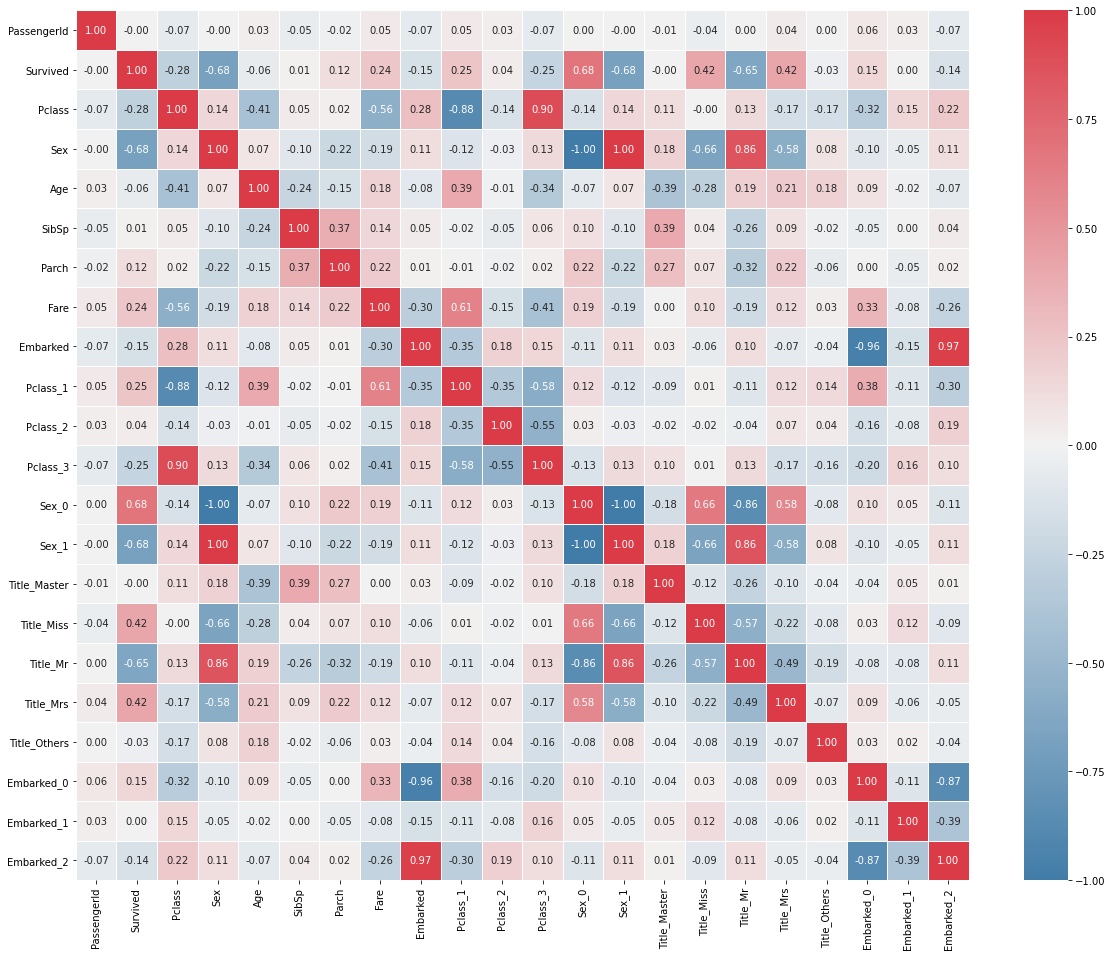

In [127]:
# Correlation 분석 heatmap 으로 시각화
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

plt.figure(figsize=(20,16))
sns.heatmap(df_titanic.corr(), annot=True, cmap = cmap, linewidths=.5, fmt = '.2f', annot_kws={"size":10})
plt.show()

In [128]:
# 반대쪽 삼각형은 안보이게 설정
# fmt = 실제 값 표시 .2f 소수점 2째 자리

df_corr = df_titanic.corr()
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

df_corr_positive = df_corr[df_corr >= 0.2]
df_corr_negative = df_corr[(df_corr <= -0.2) & (df_corr <= 0.99) | (df_corr == -1.0)]

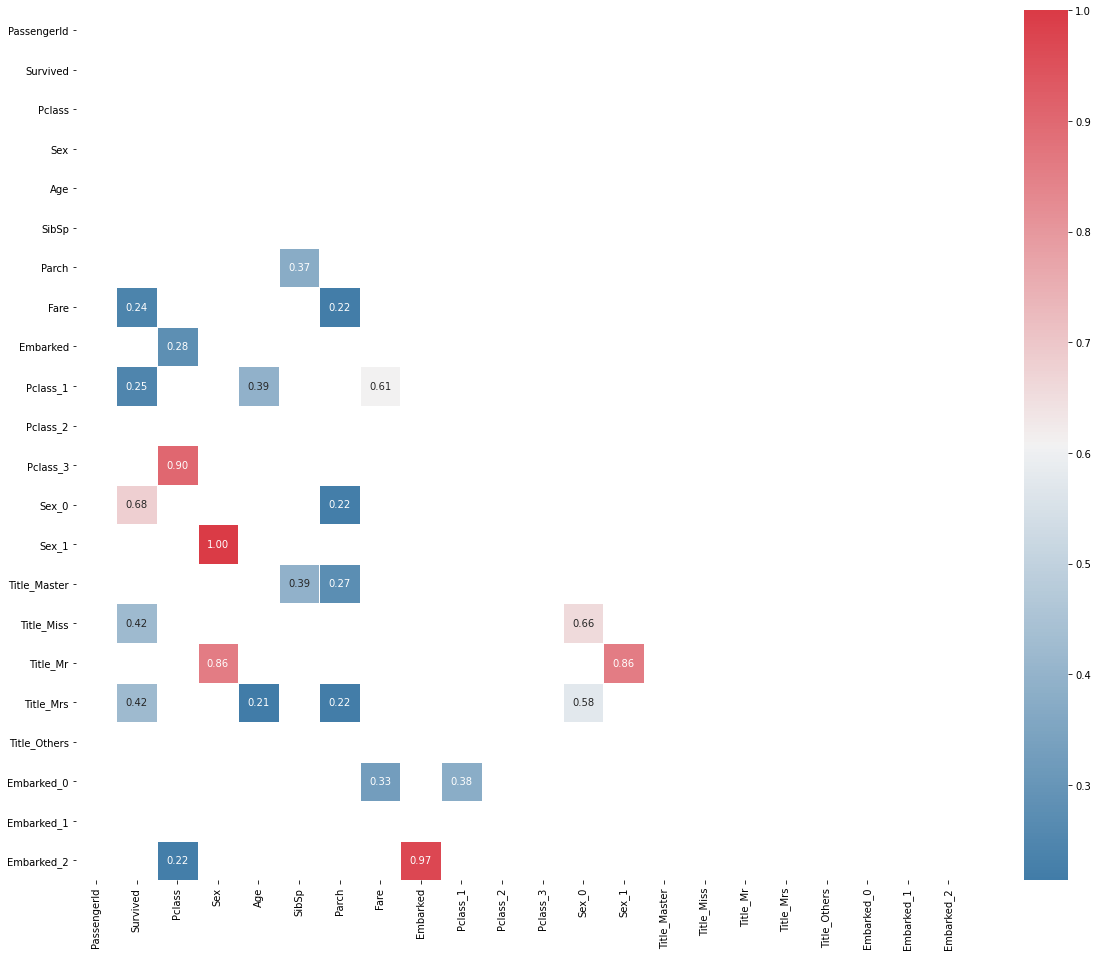

In [129]:
# Positive 상관관계 0.2 이상
plt.figure(figsize=(20,16))

sns.heatmap(df_corr_positive, annot=True, mask=mask, cmap=cmap, linewidths=.6, fmt = '.2f', annot_kws={"size":10})
plt.show()

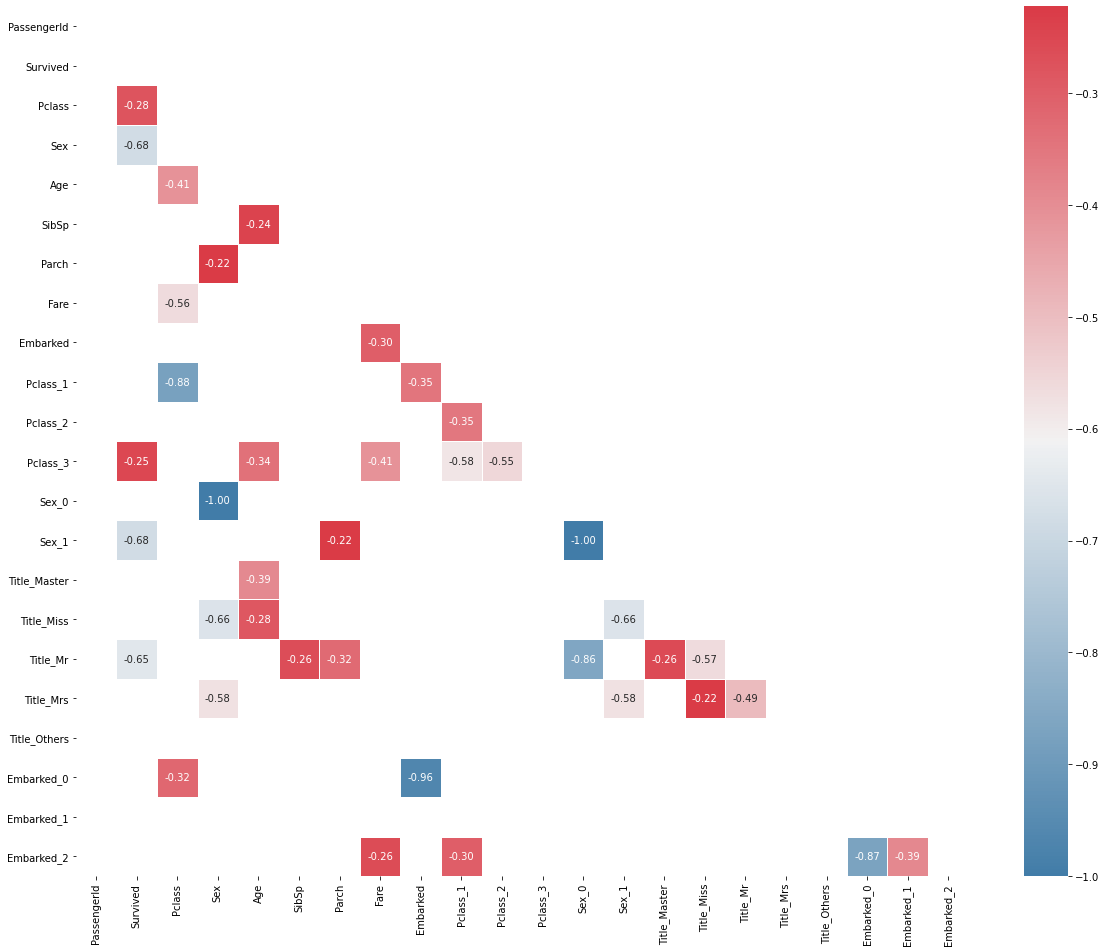

In [130]:
# Negative 상관관계 - 0.2 이하
plt.figure(figsize=(20,16))

sns.heatmap(df_corr_negative, annot=True, mask=mask, cmap=cmap, linewidths=.5, fmt = '.2f', annot_kws={"size":10})
plt.show()

#### 상관관계가 높은 변수 확인


In [131]:
df_corr.sort_values(by='Survived', ascending=False)[['Survived']]

Survived
Survived      1.000000
Sex_0         0.683255
Title_Miss    0.421761
Title_Mrs     0.420865
Pclass_1      0.246069
Fare          0.238495
Embarked_0    0.154045
Parch         0.116394
Pclass_2      0.036859
SibSp         0.012254
Embarked_1    0.000967
Title_Master -0.000787
PassengerId  -0.004425
Title_Others -0.025946
Age          -0.055687
Embarked_2   -0.143412
Embarked     -0.153514
Pclass_3     -0.250729
Pclass       -0.279133
Title_Mr     -0.645696
Sex_1        -0.683255
Sex          -0.683255

### 종속변수(Survived)와 상관관계 확인

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

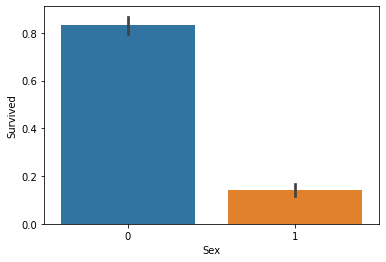

In [132]:
sns.barplot(x='Sex', y='Survived', data=df_titanic)

<AxesSubplot:xlabel='Title', ylabel='Survived'>

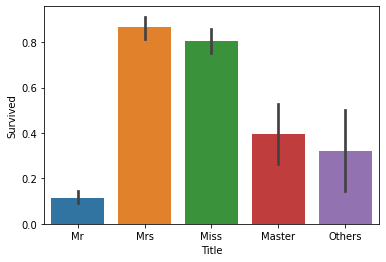

In [133]:
# 'Master', 'Miss', 'Mr', 'Mrs', 'Others' -> 0, 1, 2, 3, 4 순으로
sns.barplot(x='Title', y='Survived', data=df_titanic)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

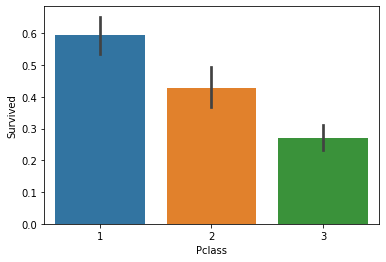

In [134]:
sns.barplot(x='Pclass', y='Survived', data=df_titanic)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

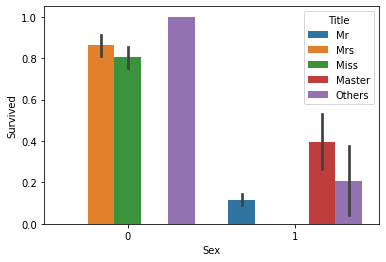

In [135]:
# 'Master', 'Miss', 'Mr', 'Mrs', 'Others' -> 0, 1, 2, 3, 4 순으로
sns.barplot(x='Sex',y='Survived', hue='Title', data=df_titanic)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

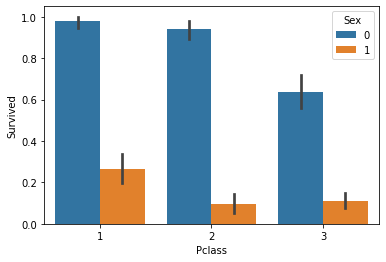

In [136]:
sns.barplot(x='Pclass',y='Survived', hue='Sex', data=df_titanic)

In [137]:
# Sex 별로 생존자 확인
pd.crosstab(df_titanic.Sex, df_titanic.Survived, margins=True).style.background_gradient(cmap='Blues')

In [138]:
# Pclass 별로 생존자 확인
pd.crosstab(df_titanic.Pclass, df_titanic.Survived, margins=True).style.background_gradient(cmap='Blues')

In [139]:
# Title 별로 생존자 확인
pd.crosstab(df_titanic.Title, df_titanic.Survived, margins=True).style.background_gradient(cmap='Blues')

## 분석에 필요한 컬럼만 추가
### X(독립변수)
- Pclass (범주형, dummy)
- Sex (범주형, dummy)
- Age (수치형)
- Sibsp (수치형)
- Parch (수치형)
- Fare (수치형, natural log)/ Fare는 자연로그로 변환하여 입력(왜도값이 높음)

### y(종속변수)
- Survived(생존 여부)

### pclass_1, Sex_0 은 기준이 되는 변수이므로 제외하고 회귀 분석을 실시했습니다.

In [140]:
df_titanic_lr = df_titanic[['Survived',
                            'Age',
                            'SibSp',
                            'Parch',
                            'Fare',
                            'Pclass_2',
                            'Pclass_3',
                            'Sex_1']]

df_titanic_lr.head()

Survived   Age  SibSp  Parch     Fare  Pclass_2  Pclass_3  Sex_1
1         0  22.0      1      0   7.2500         0         1      1
2         1  38.0      1      0  71.2833         0         0      0
3         1  26.0      0      0   7.9250         0         1      0
4         1  35.0      1      0  53.1000         0         0      0
5         0  35.0      0      0   8.0500         0         1      1

In [141]:
# fare를 자연로그로 한 뒤 다시 한번 분석

df_titanic_lr['Fare'] = df_titanic_lr['Fare'].apply(lambda x: np.log(x) if x != 0.0 else x)
df_titanic_lr.head()

Survived   Age  SibSp  Parch      Fare  Pclass_2  Pclass_3  Sex_1
1         0  22.0      1      0  1.981001         0         1      1
2         1  38.0      1      0  4.266662         0         0      0
3         1  26.0      0      0  2.070022         0         1      0
4         1  35.0      1      0  3.972177         0         0      0
5         0  35.0      0      0  2.085672         0         1      1

<AxesSubplot:>

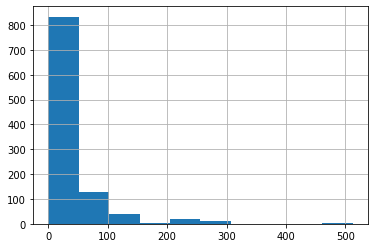

In [142]:
# 자연로그 취하기전
df_titanic['Fare'].hist()

<AxesSubplot:>

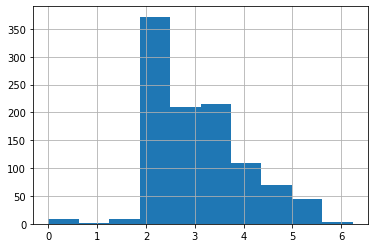

In [143]:
df_titanic_lr['Fare'].hist()

#### csv 파일로 저장

In [144]:
df_titanic_lr.to_csv("./data/classification/df_titanic.csv", index=False, mode='w')

## 로지스틱 회귀모형 모델링

In [145]:
# 상수항 추가
df_logit = sm.add_constant(df_titanic_lr, has_constant='add')
df_logit

const  Survived   Age  SibSp  Parch      Fare  Pclass_2  Pclass_3  Sex_1
1      1.0         0  22.0      1      0  1.981001         0         1      1
2      1.0         1  38.0      1      0  4.266662         0         0      0
3      1.0         1  26.0      0      0  2.070022         0         1      0
4      1.0         1  35.0      1      0  3.972177         0         0      0
5      1.0         0  35.0      0      0  2.085672         0         1      1
..     ...       ...   ...    ...    ...       ...       ...       ...    ...
410    1.0         1   3.0      1      1  2.622855         0         1      0
412    1.0         1  37.0      1      0  4.499810         0         0      0
413    1.0         1  28.0      0      0  2.050913         0         1      0
415    1.0         1  39.0      0      0  4.690430         0         0      0
416    1.0         0  38.5      0      0  1.981001         0         1      1

[1043 rows x 9 columns]

In [146]:
feature_columns = (df_logit.columns.difference(['Survived']))

X = df_logit[feature_columns]
y = df_logit['Survived']

model = sm.Logit(y,X)
result_model = model.fit()

Optimization terminated successfully.
         Current function value: 0.376342
         Iterations 7


In [147]:
result_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1043
Model:                          Logit   Df Residuals:                     1035
Method:                           MLE   Df Model:                            7
Date:                Mon, 26 Apr 2021   Pseudo R-squ.:                  0.4401
Time:                        13:35:09   Log-Likelihood:                -392.52
converged:                       True   LL-Null:                       -701.05
Covariance Type:            nonrobust   LLR p-value:                5.184e-129
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0365      0.007     -4.905      0.000      -0.051      -0.022
Fare           0.1063      0.165      0.643      0.520      -0.218       0.430
Parch         -0.1229      0.120     -1.024      0.306      -0.358       0.112
Pclass_2      -1.2002      0.322     -3.732      0.000      -1.831      -0.570
Pclass_3      -2.0943      0.392     -5.338      0.000      -2.863      -1.325
Sex_1         -3.6807      0.209    -17.599      0.000      -4.091      -3.271
SibSp         -0.3393      0.123     -2.761      0.006      -0.580      -0.098
const          4.0192      0.783      5.132      0.000       2.484       5.554
==============================================================================
"""

In [148]:
params = result_model.params
conf = result_model.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']

df_odds = pd.DataFrame(np.exp(conf))
df_odds

5%         95%  Odds Ratio
Age        0.950203    0.978327    0.964163
Fare       0.804342    1.537668    1.112120
Parch      0.698876    1.119002    0.884332
Pclass_2   0.160323    0.565608    0.301131
Pclass_3   0.057078    0.265720    0.123153
Sex_1      0.016730    0.037977    0.025206
SibSp      0.559824    0.906229    0.712270
const     11.991998  258.296899   55.655152

In [149]:
# Odds 
np.exp(result_model.params)

Age          0.964163
Fare         1.112120
Parch        0.884332
Pclass_2     0.301131
Pclass_3     0.123153
Sex_1        0.025206
SibSp        0.712270
const       55.655152
dtype: float64

In [150]:
# Age값 10, 30, 50으로 설정 나머지 변수들은 평균값(mean)으로 설정
list_age = [10, 30, 50]
mean_fare = np.mean(X['Fare'])
mean_parch = np.mean(X['Parch'])
mean_pclass_2 = np.mean(X['Pclass_2'])
mean_pclass_3 = np.mean(X['Pclass_3'])
mean_sex_1 = np.mean(X['Sex_1'])
mean_sibsp = np.mean(X['SibSp'])

df_titanic_lr_pred = pd.DataFrame({'Age': list_age, 'Fare': mean_fare, 'Parch': mean_parch,
                                   'Pclass_2': mean_pclass_2, 'Pclass_3': mean_pclass_3,
                                   'Sex_1': mean_sex_1,'SibSp': mean_sibsp, 'const': 1})

df_titanic_lr_pred['predict'] = result_model.predict(df_titanic_lr_pred)
df_titanic_lr_pred.head()

Age      Fare    Parch  Pclass_2  Pclass_3     Sex_1     SibSp  const  \
0   10  3.005899  0.42186   0.25024  0.479386  0.629914  0.504314      1   
1   30  3.005899  0.42186   0.25024  0.479386  0.629914  0.504314      1   
2   50  3.005899  0.42186   0.25024  0.479386  0.629914  0.504314      1   

    predict  
0  0.531919  
1  0.353873  
2  0.208835